# TFY4345 - Classical Mechanics - Numerical Exercise


In [16]:
'''Imports packages, functions and constants'''
# Simple pendulum with Eulers method:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.constants import g
from IPython.display import HTML

## Simple Pendulum

### Eulers Method

In [17]:
'''Function for Eulers method'''
def euler_step(theta_vec, omg_vec, i, dt):
    omg_vec[i+1] = omg_vec[i] - (g/l)*np.sin(theta_vec[i])*dt
    theta_vec[i+1] = theta_vec[i] + omg_vec[i]*dt

def euler_solve(theta_vec, omg_vec, dt):
    for i in range(timesteps):
        euler_step(theta_vec, omg_vec, i, dt)

In [18]:
'''Parameters and initial conditiions'''
theta_0 = 0.2 #rad
omg_0 = 0 #rad/s
l = 1.0 #m (meter)
sim_time = 5 #s, simulation time
dt = 0.01 # s, timestep
timesteps = int(sim_time/dt)

In [19]:
'''arrays with vals for plotting'''
omg_vec = np.zeros(timesteps +1)
theta_vec = np.zeros(timesteps + 1)
t_vec = np.linspace(0, timesteps, theta_vec.size)

# set initial values
omg_vec[0] = omg_0
theta_vec[0] = theta_0

In [20]:
euler_solve(theta_vec, omg_vec, dt)

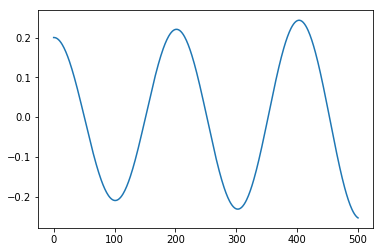

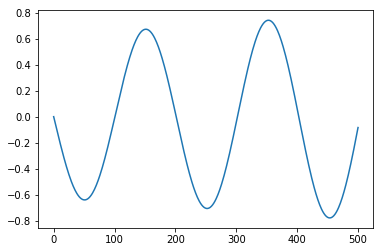

In [21]:
# plot results
plt.plot(t_vec, theta_vec)
plt.show()
plt.plot(t_vec, omg_vec)
plt.show()

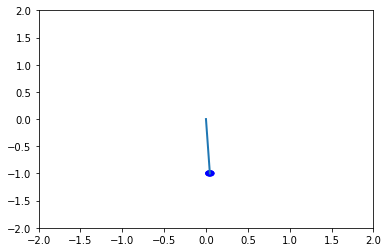

In [22]:
'''Animation, currently at arbitrary speed/time :p'''

# cartesian coordinates of the pendulum tip
x = np.sin(theta_vec)
y = -np.cos(theta_vec)

# arbitrarily chosen FPS
FPS = 30

# Set up fig and stuff for the animated plot
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
string, = ax.plot([], [], lw=2)
mass = plt.Circle((x[0], y[0]), 0.05, color='blue')
framecount = int(FPS*sim_time)

def init():
    string.set_data([],[])
    ax.add_artist(mass)
    return string,


def animate(j):
    i = j*int(timesteps/framecount)
    mass.center = (x[i], y[i])
    string.set_data([0, x[i]], [0, y[i]])
    return string, mass


anim = FuncAnimation(fig, animate, init_func=init, frames=framecount, interval=20, blit=True)
HTML(anim.to_html5_video())


### Euler-Cromer method

In [23]:
def euler_cromer_step(theta_vec, omg_vec, i, dt):
    omg_vec[i+1] = omg_vec[i] - (g/l)*np.sin(theta_vec[i])*dt
    theta_vec[i+1] = theta_vec[i] + omg_vec[i+1]*dt

def euler_cromer_solve(theta_vec, omg_vec, dt):
    for i in range(timesteps):
        euler_cromer_step(theta_vec, omg_vec, i, dt)

In [24]:
'''Resets arrays and v'''
omg_vec = np.zeros(timesteps +1)
theta_vec = np.zeros(timesteps + 1)
t_vec = np.linspace(0, timesteps, theta_vec.size)

# set initial values
omg_vec[0] = omg_0
theta_vec[0] = theta_0

In [25]:
euler_cromer_solve(theta_vec, omg_vec, dt)

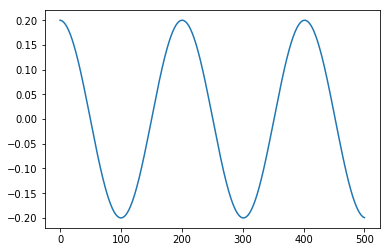

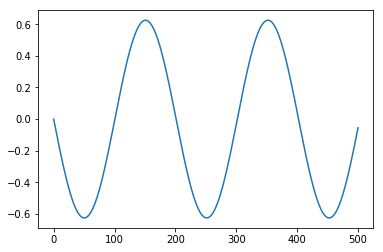

In [26]:
# plot results
plt.plot(t_vec, theta_vec)
plt.show()
plt.plot(t_vec, omg_vec)
plt.show()